<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


C:\Users\vsneh\AppData\Local\Temp\ipykernel_20208\3804052050.py:4: FutureWarning: Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dataset['TransactionTime'] = pd.to_datetime(dataset['TransactionTime'])


   UserId  DaysActive  UniqueTransactions  TotalSales  \
0  259266           0                   1   641217.60   
1  259287        3602                   7    35759.40   
2  259308         282                   4    14963.04   
3  259329           0                   1    14571.84   
4  259350           0                   1     2774.40   

   AverageSalesPerTransaction  
0               641217.600000  
1                 5108.485714  
2                 3740.760000  
3                14571.840000  
4                 2774.400000  
{'average_sales': 22247.773742041405, 'average_purchase_freq': 4.272014753342554, 'churn_rate': 0.20101429230059936, 'max_days': 3658}
{'average_sales': 22247.773742041405, 'average_purchase_freq': 4.272014753342554, 'churn_rate': 0.20101429230059936, 'max_days': 3658, 'clv_churn_method': 14256422.648254193, 'clv_lifetime_method': 71438.34801001896}


'Average Sales (average_sales: 22,247.77):\n\nThis value represents the average amount spent by a customer per unique transaction. It indicates a relatively high average sale, suggesting that customers are likely purchasing higher-priced items or making significant transactions.\nAverage Purchase Frequency (average_purchase_freq: 4.27):\n\nThis metric indicates that, on average, customers make approximately 4.27 purchases during the specified period. It reflects customer engagement and can help in understanding how often customers return to buy.\nChurn Rate (churn_rate: 0.20 or 20.10%):\n\nThis is the percentage of customers who stop purchasing over a specific timeframe. A churn rate of 20.10% means that about one-fifth of your customers are not returning to make purchases. This value can guide strategies for customer retention.\nMax Days Active (max_days: 3,658):\n\nThis indicates the maximum number of days that any customer has been active (engaging in purchases). In this case, it sh

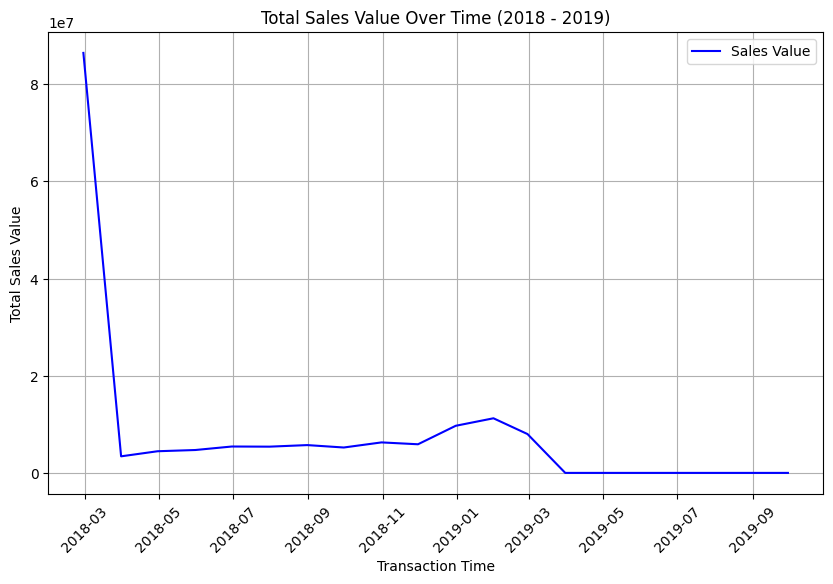

In [1]:
import pandas as pd
dataset = pd.read_csv(r'data\transaction_data.csv')
dataset.info()
dataset['TransactionTime'] = pd.to_datetime(dataset['TransactionTime'])
dataset.head()
dataset['SalesValue'] = dataset['NumberOfItemsPurchased'] * dataset['CostPerItem']

dataset['SalesValue'].sum()
df_resampled = dataset.resample('M', on='TransactionTime')['SalesValue'].sum().reset_index()
import matplotlib.pyplot as plt


   UserId  DaysActive  UniqueTransactions  TotalSales  \
0  259266           0                   1   641217.60   
1  259287        3602                   7    35759.40   
2  259308         282                   4    14963.04   
3  259329           0                   1    14571.84   
4  259350           0                   1     2774.40   

   AverageSalesPerTransaction  
0               641217.600000  
1                 5108.485714  
2                 3740.760000  
3                14571.840000  
4                 2774.400000  
{'average_sales': 22247.773742041405, 'average_purchase_freq': 4.272014753342554, 'churn_rate': 0.20101429230059936, 'max_days': 3658}
{'average_sales': 22247.773742041405, 'average_purchase_freq': 4.272014753342554, 'churn_rate': 0.20101429230059936, 'max_days': 3658, 'clv_churn_method': 14256422.648254193, 'clv_lifetime_method': 71438.34801001896}


'Average Sales (average_sales: 22,247.77):\n\nThis value represents the average amount spent by a customer per unique transaction. It indicates a relatively high average sale, suggesting that customers are likely purchasing higher-priced items or making significant transactions.\nAverage Purchase Frequency (average_purchase_freq: 4.27):\n\nThis metric indicates that, on average, customers make approximately 4.27 purchases during the specified period. It reflects customer engagement and can help in understanding how often customers return to buy.\nChurn Rate (churn_rate: 0.20 or 20.10%):\n\nThis is the percentage of customers who stop purchasing over a specific timeframe. A churn rate of 20.10% means that about one-fifth of your customers are not returning to make purchases. This value can guide strategies for customer retention.\nMax Days Active (max_days: 3,658):\n\nThis indicates the maximum number of days that any customer has been active (engaging in purchases). In this case, it sh

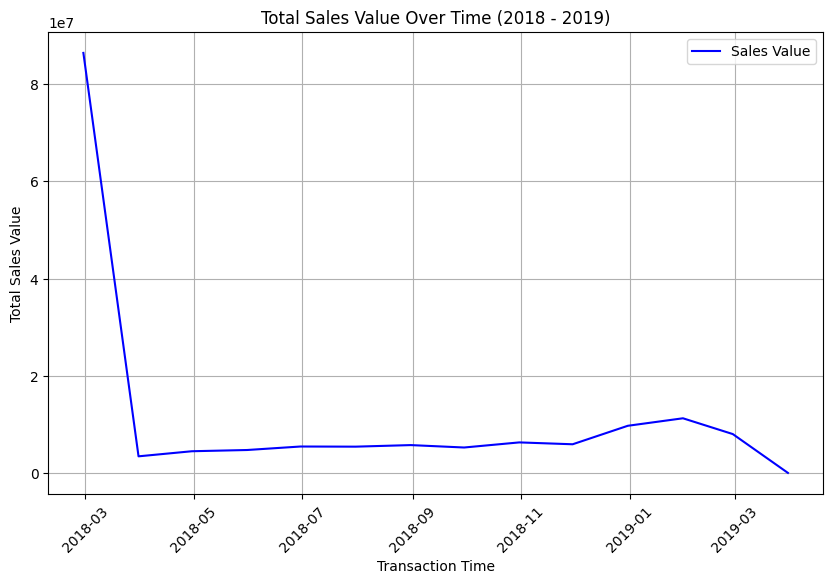

In [3]:


dataset['SalesValue'].sum()
df_resampled = dataset.resample('M', on='TransactionTime')['SalesValue'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_filtered = df_resampled[(df_resampled['TransactionTime'] >= '2018-01-01') & (df_resampled['TransactionTime'] <= '2019-04-01')]
plt.plot(df_filtered['TransactionTime'], df_filtered['SalesValue'], label='Sales Value', color='blue')

# Customize plot
plt.title('Total Sales Value Over Time (2018 - 2019)')
plt.xlabel('Transaction Time')  # Label for the x-axis
plt.ylabel('Total Sales Value')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()



# Show the plot
plt.tight_layout
dataset.head()
# First, group by UserId and TransactionId to summarize sales per transaction
customer_sales_1_df = dataset.groupby(['UserId', 'TransactionId']).agg({
    'SalesValue': 'sum',  # Sum of sales values per transaction
    'TransactionTime': 'max'  # Latest timestamp per transaction
}).reset_index()



customer_sales_1_df.head(
)
# Filter out rows where UserId is -1
customer_sales_1_df = customer_sales_1_df[customer_sales_1_df['UserId'] != -1]

# Filter out rows where SalesValue is 0.00
customer_sales_1_df = customer_sales_1_df[customer_sales_1_df['SalesValue'] > 0]
# Then, group by UserId to calculate metrics at the customer level
customer_sales_1_df = customer_sales_1_df.groupby('UserId').agg({
    'TransactionTime': lambda x: (x.max() - x.min()).days,  # Days active
    'TransactionId': 'nunique',  # Number of unique transactions
    'SalesValue': ['sum', 'mean']  # Total and average sales per transaction
}).reset_index()


# Rename the columns for clarity
customer_sales_1_df.columns = ['UserId', 'DaysActive', 'UniqueTransactions', 'TotalSales', 'AverageSalesPerTransaction']

# Display the result
print(customer_sales_1_df.head())


customer_sales_1_df['avg_sales'] = customer_sales_1_df['TotalSales'] / customer_sales_1_df['UniqueTransactions']

# 2. Assuming frequency is the same as UniqueTransactions for simplicity
customer_sales_1_df['frequency'] = customer_sales_1_df['UniqueTransactions']  # Frequency of purchases

# 3. Renaming the DaysActive to time_days for consistency
customer_sales_1_df['time_days'] = customer_sales_1_df['DaysActive']  # Assuming DaysActive column is available

# 4. Summary calculations
summary_1 = {
    'average_sales': customer_sales_1_df['avg_sales'].mean(),
    'average_purchase_freq': customer_sales_1_df['frequency'].mean(),
    'churn_rate': (customer_sales_1_df['frequency'] > 5).sum() / len(customer_sales_1_df['frequency']),
    'max_days': customer_sales_1_df['time_days'].max()
}

# Displaying the summary
print(summary_1)
profit_margin = 0.15
customer_lifetime = 0.5  # In years
eps_churn_rate = 0.001

summary_1['clv_churn_method'] = (summary_1['average_sales'] * summary_1['average_purchase_freq']) / eps_churn_rate * profit_margin

# Lifetime CLV Calculation
summary_1['clv_lifetime_method'] = (
    summary_1['average_sales'] * summary_1['average_purchase_freq'] *
    (summary_1['max_days'] / 365) * customer_lifetime * profit_margin
)

# Display final summary with CLV calculations
print(summary_1)
'''Average Sales (average_sales: 22,247.77):

This value represents the average amount spent by a customer per unique transaction. It indicates a relatively high average sale, suggesting that customers are likely purchasing higher-priced items or making significant transactions.
Average Purchase Frequency (average_purchase_freq: 4.27):

This metric indicates that, on average, customers make approximately 4.27 purchases during the specified period. It reflects customer engagement and can help in understanding how often customers return to buy.
Churn Rate (churn_rate: 0.20 or 20.10%):

This is the percentage of customers who stop purchasing over a specific timeframe. A churn rate of 20.10% means that about one-fifth of your customers are not returning to make purchases. This value can guide strategies for customer retention.
Max Days Active (max_days: 3,658):

This indicates the maximum number of days that any customer has been active (engaging in purchases). In this case, it shows that the longest-active customer has been with the business for about 10 years (3,658 days).
Churn CLV Method (clv_churn_method: 14,256,422.65):

This represents the estimated Customer Lifetime Value using the churn method. It suggests that, on average, a customer is expected to generate approximately 14.26 million in total sales over their lifetime, considering the average sales, purchase frequency, and churn rate. This is a very high value, indicating the potential profitability of a retained customer.
Lifetime CLV Method (clv_lifetime_method: 71,438.35):

This is the estimated Customer Lifetime Value using the lifetime method. It indicates that each customer is expected to generate about 71.44 thousand over their lifetime when accounting for the maximum days they were active and the profit margin. This value is more conservative than the churn method but still indicates strong potential revenue.
Overall Insights
High Value Customers: The data indicates that customers tend to spend significantly per transaction, and those who remain engaged can generate substantial revenue.
Retention Opportunities: The churn rate suggests that there is room for improvement in customer retention strategies. Reducing churn could lead to even higher CLV.
Business Potential: The CLV values show a strong potential for profitability, especially if customer retention efforts are successful.
Long-term Relationships: The max days active indicate that customers can remain engaged with the business for many years, which can be beneficial for long-term planning and investment in customer relationships.
Recommendations
Focus on Retention: Implement strategies to reduce churn, such as loyalty programs or personalized marketing.
Analyze High-Value Transactions: Investigate what drives high sales in transactions to replicate successful patterns.
Monitor Engagement: Keep track of customer engagement metrics to identify at-risk customers and intervene before they churn.'''





